In [1]:
import sys
import os
sys.path.append("""/home/jonfrey/ASL/src""")
os.chdir("/home/jonfrey/ASL")

import torch
import numpy as np
from PIL import Image
import imageio
import pickle
from visu import Visualizer
from PIL import ImageDraw, ImageFont
from torchvision import transforms as tf

In [2]:
visu = Visualizer(os.getenv('HOME')+'/tmp', logger=None, epoch=0, store=False, num_classes=41)

In [3]:
H,W = 640, 1280
with open('/home/jonfrey/ASL/cfg/dataset/mappings/coco_nyu.pkl', 'rb') as handle:
    mappings = pickle.load(handle)
print( mappings.keys() )

dict_keys(['coco_name_nyu_name', 'coco_id_nyu_name', 'coco_id_nyu_id', 'coco_id_name', 'nyu_name_id'])


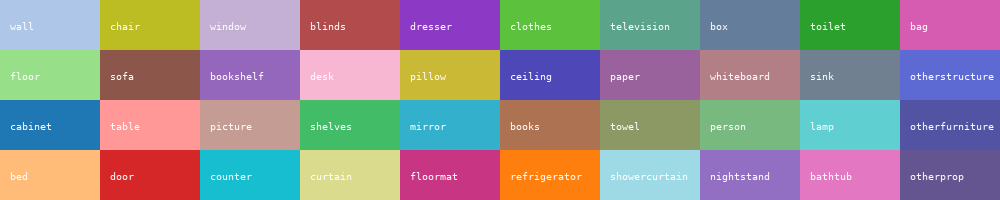

In [4]:
col = np.zeros( (200,1000) )
for i in range(0,40):
    w_ = int(i/4)* 100
    w__ = w_+100
    h_ = (i%4)*50
    h__ = h_+50
    col[h_:h__,w_:w__ ] = i+1
    
r= visu.plot_segmentation(seg=col)
img = Image.fromarray(r)
d = ImageDraw.Draw(img)

fnt = ImageFont.truetype("/usr/share/fonts/truetype/DejaVuSansMono.ttf", 10)                         
for i in range(0,40):
    w_ = int(i/4)* 100 + 10
    h_ = (i%4)*50 + 20
    d.text((w_,h_), list(mappings['nyu_name_id'].keys())[i+1], font=fnt, fill=(255,255,255))

display(img)

Failed converting tensor to numpy


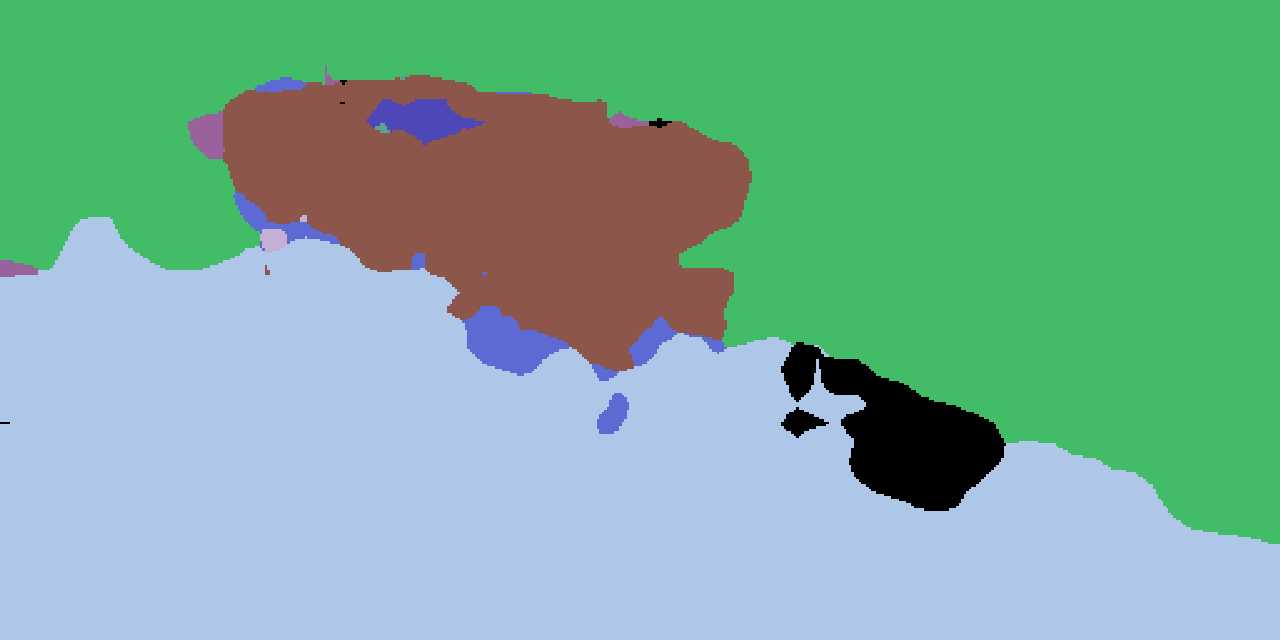

Failed converting tensor to numpy
Failed converting tensor to numpy


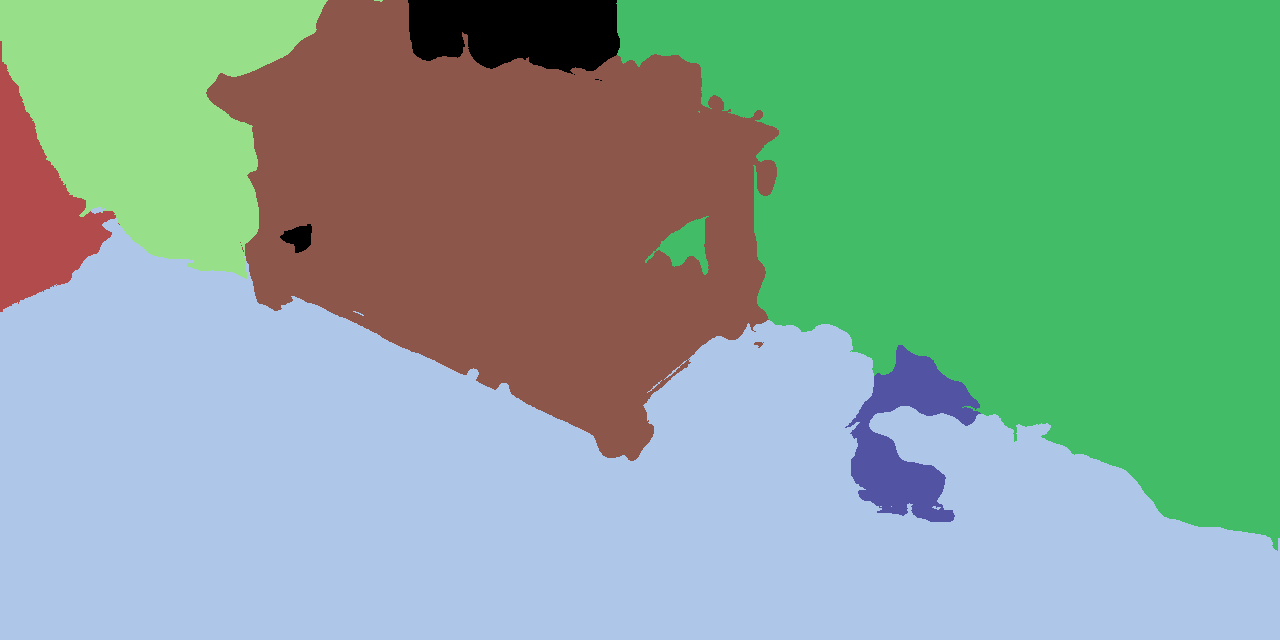

Failed converting tensor to numpy


In [5]:
from pseudo_label import PseudoLabelGenerator
plg = PseudoLabelGenerator(visu=visu,visu_active=False)
from pseudo_label import readSegmentation
pred, target, valid = readSegmentation("/home/jonfrey/results/scannet_eval/run_24h_train_1gpu/scannet/scene0000_00/segmentation_deeblab_v3/50.png")
r= visu.plot_segmentation(seg=pred,jupyter=True)
r= visu.plot_segmentation(seg=target,jupyter=True)

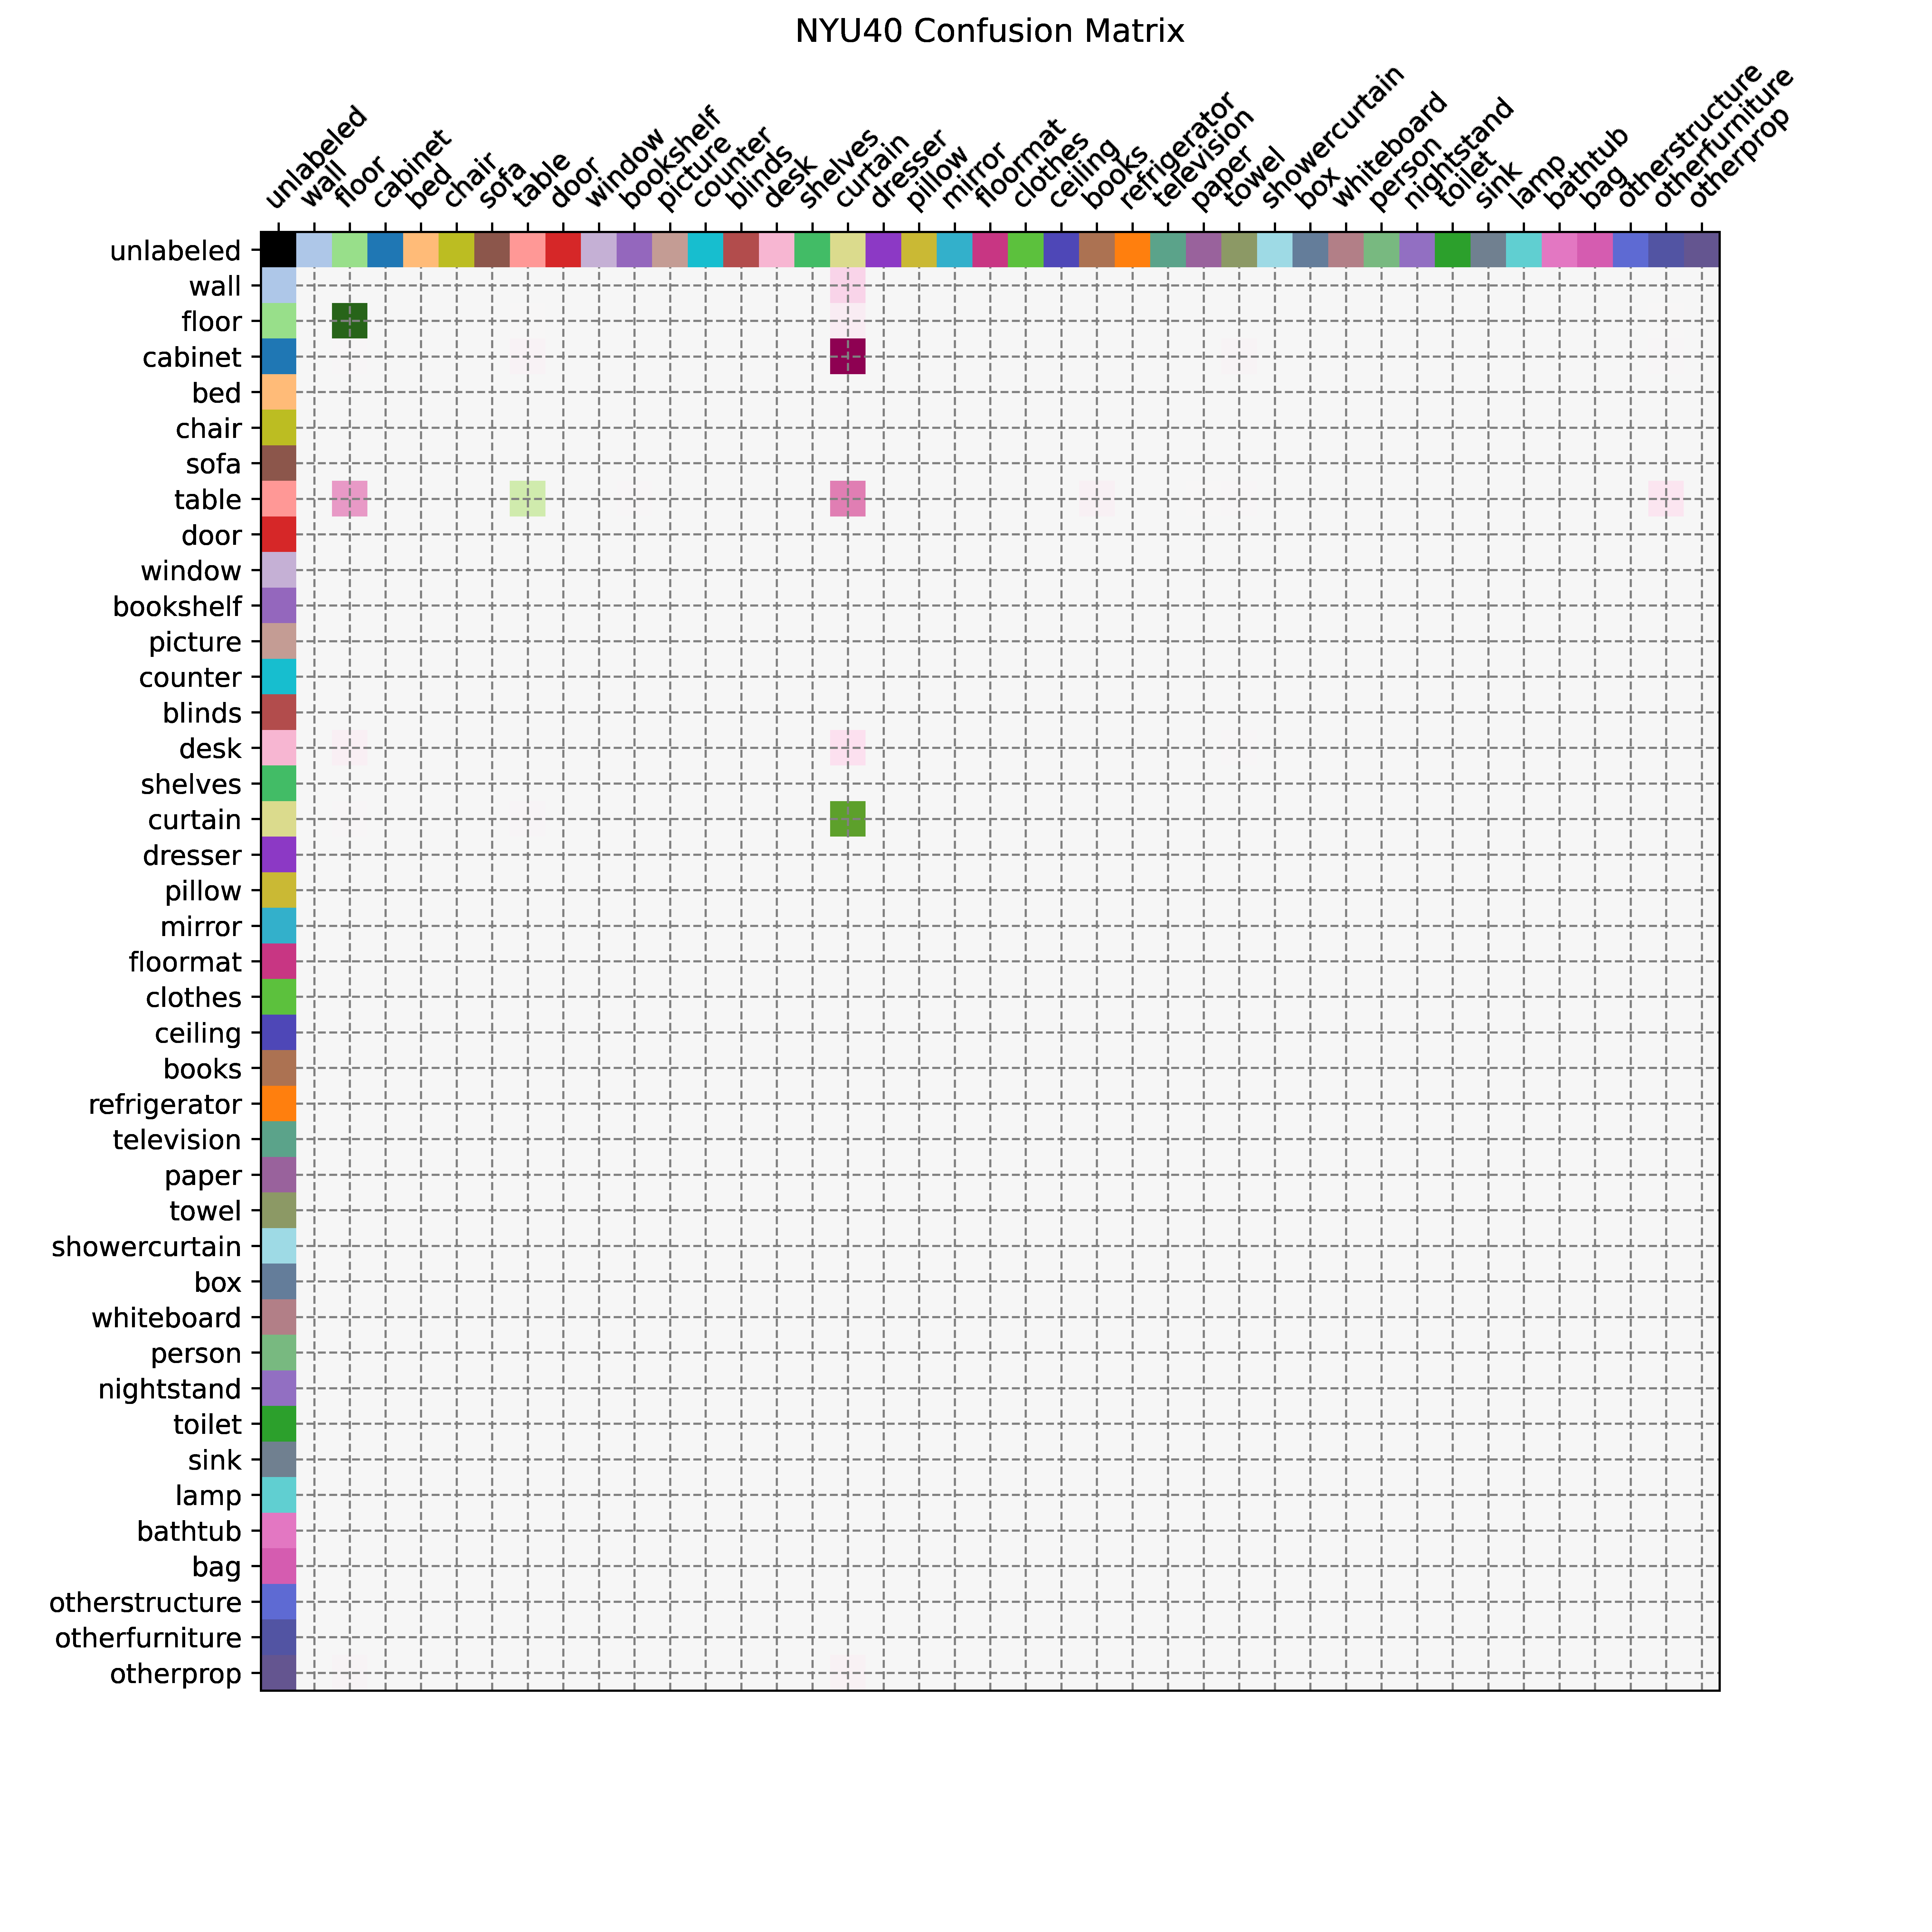

In [6]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(target.flatten(), pred.flatten(), labels=np.arange(40))
r= visu.plot_nyu_confusion_matrix(conf ,jupyter=True)

In [7]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from visu import SCANNET_COLOR_MAP
import matplotlib.patches as patches

def plot_nyu_confusion_matrix(self, conf):
    label_y = [ str(i) for i in range(conf.shape[0]+1)]
    label_x = [ str(i) for i in range(conf.shape[1]+1)]
    fig, ax = plt.subplots( figsize=(10,10))
    conf_expa = np.zeros((conf.shape[0]+1,conf.shape[1]+1))
    conf_expa[:conf.shape[0],:conf.shape[1]] = conf

    diago = np.eye(conf_expa.shape[0],dtype=bool)
    conf_expa[diago==False] *= -1
    fac = -conf_expa.max()/conf_expa.min()
    conf_expa[diago==False] *= fac
    im = ax.imshow(conf_expa,cmap=cm.get_cmap('PiYG'))

    for i in range( len(label_y)):
        v = SCANNET_COLOR_MAP[i]
        vals= (v[0]/255,v[1]/255,v[2]/255,1)
        rect = patches.Rectangle((i-0.5, -0.5), 1, 1, linewidth=1, edgecolor=None, facecolor= vals )
        rect2 = patches.Rectangle((0-0.5, i-0.5), 1, 1, linewidth=1, edgecolor=None, facecolor= vals )
        ax.add_patch(rect)
        ax.add_patch(rect2)

    ax.set_xticks(np.arange(len(label_x)))
    ax.set_yticks(np.arange(len(label_y)))
    ax.set_xticklabels(list(mappings['nyu_name_id'].keys())[:])
    ax.set_yticklabels(list(mappings['nyu_name_id'].keys())[:])

    ax.xaxis.tick_top()
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    ax.xaxis.grid(color='gray', linestyle='dashed')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
              rotation_mode="anchor")
    ax.set_title("Confusion Matrix NYU Labels")
    plt.show()

In [8]:
conf.shape

(40, 40)